In [6]:
import numpy as np
import matplotlib.pyplot as plt
from hamming_distance_distribution import hamming_distance_distribution_exhaustive

In [7]:
def sweep_neglection_param(neglection_param, neglection_rule, N_repeat, N, M, alpha, K, xi):
    """records certain values for each value of a neglection parameter

    Parameters:
    - neglection_param:          np.array with all neglection parameters, i.e. all thresholds if neglection_rule==1 or all numbers of matrix elements to neglect, if neglection_rule==2
    - neglection_rule:           0: neglect smallest matrix element
                                 1: neglect everything below threshold
                                 2: neglect given number of smallest matrix elements
    - alpha:                     activity pattern

    Returns:
    for each neglection_param:
    - N_n:           avg. number of neglected matrix elements 
    - N_correct:     number of correct detections
    - N_connected:   number of connected graphs
    """
    N_param = len(neglection_param)
    
    N_n         = np.zeros(N_param)
    N_correct   = np.zeros(N_param)
    N_connected = np.zeros(N_param)

    for i in range(len(neglection_param)):
        distr = hamming_distance_distribution_exhaustive(N_repeat, N, M, alpha, K, xi, neglection_rule, neglection_thres=neglection_param[i], verbose=False)
        
        N_correct[i]    = distr[1][0]
        N_n[i]          = distr[2]
        N_connected[i]  = distr[3]

    return N_n, N_correct, N_connected

In [8]:
# ------------ Parameters -------------
N = 5
M = 4
K = 100
xi = 0

N_repeat = 1000
N_thres = 100
thres_min = 0
thres_max = 1

In [9]:
# ------------- Program -----------------

# activity pattern
alpha = np.zeros(N)
alpha[0] = 1
alpha[2] = 1

# prepare arrays to store data for all methods
N_n = []
N_correct = []
N_connected = []

# Method 1: threshold
print("Method 1")
neglection_thres = np.linspace(thres_min, thres_max, N_thres)
result = sweep_neglection_param(neglection_thres, 1, N_repeat, N, M, alpha, K, xi)
N_n.append(result[0])
N_correct.append(result[1])
N_connected.append(result[2])

# Method 2: number of neglected matrix elements
print("Method 2")
neglection_number = np.arange(0, int(N*(N-1)/2)+1)
result = sweep_neglection_param(neglection_number, 2, N_repeat, N, M, alpha, K, xi)
N_n.append(result[0])
N_correct.append(result[1])
N_connected.append(result[2])

# Method 3: maximum degree of nodes
print("Method 3")
max_degree = np.arange(0, N)
result = sweep_neglection_param(max_degree, 3, N_repeat, N, M, alpha, K, xi)
N_n.append(result[0])
N_correct.append(result[1])
N_connected.append(result[2])


Method 1
Method 2
Method 3


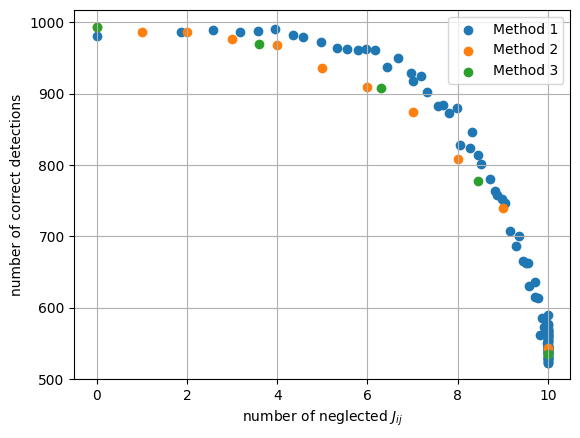

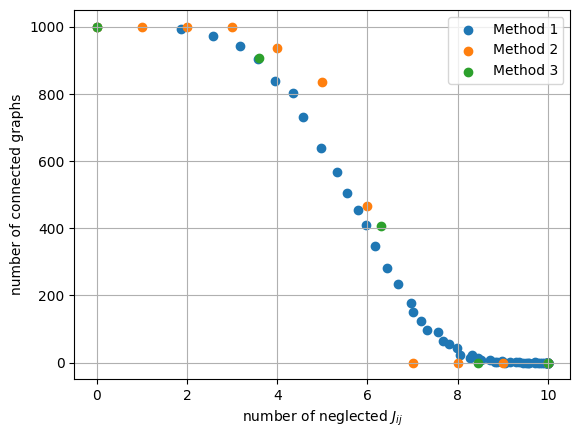

In [10]:
# -------------- plotting --------------
# correctness
for i in range(len(N_n)):
    plt.scatter(N_n[i], N_correct[i], label=f"Method {i+1}")
plt.ylabel("number of correct detections")
plt.xlabel(r"number of neglected $J_{ij}$")
plt.grid(True)
plt.legend()
plt.show()

# connectedness
for i in range(len(N_n)):
    plt.scatter(N_n[i], N_connected[i], label=f"Method {i+1}")
plt.ylabel("number of connected graphs")
plt.xlabel(r"number of neglected $J_{ij}$")
plt.grid(True)
plt.legend()
plt.show()